<a href="https://colab.research.google.com/github/ditorizkyka/Artificial-Intelligence-Projects/blob/main/PROJECT_KA_KEL5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT BASED LEARNING : Crab Age Prediction**

Anggota Kelompok :
1.   Andito Rizkyka Rianto  - 1301220016
2.   Imam Wijayanto         - 1301223117
3.   Widya Herry Mulyani - 1301223147

**DESKRIPSI MASALAH**

Kepiting sangat lezat dan banyak negara di dunia mengimpor kepiting dalam jumlah besar. Keuntungan utamanya melakukan budidaya rajungan ialah karena pertumbuhannya yang sangat cepat.

Pada permasalahan kali ini, kita akan memprediksi Umur kepiting dengan beberapa fitur untuk nantinya dapat digunakan untuk dijual kepada pelanggan dengan tepat bedasarkan prediksi yang dilakukan dengan kNN Regresion




# EDA(*Explanatory Data Analysis*)

Pada tahap ini, kami akan menunjukan sedikit paparan mengenai informasi dataset yang digunakan. Dataset ini bersumber dari kaggle.com dengan judul data set yaitu *Crab Age Predictio*n.

**DESKRIPSI DATASET**

Dataset tersebut digunakan untuk memperkirakan umur kepiting berdasarkan atribut fisiknya (sex, length, diameter, height, weight, shucked weight, viscera weight, shell weight) . Ini adalah titik awal yang bagus untuk analisis regresi klasik dan rekayasa fitur serta memahami dampak rekayasa fitur dalam domain Ilmu Data.

Dibawah ini adalah visualisasi stastistik, dan informasi gambaran terkait Dataset *Crab Age Prediction*

In [ ]:
# Melakukan Import library yang diperlukan (Kecuali library model)
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('CrabAgePrediction.csv')
data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [ ]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [ ]:
data.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


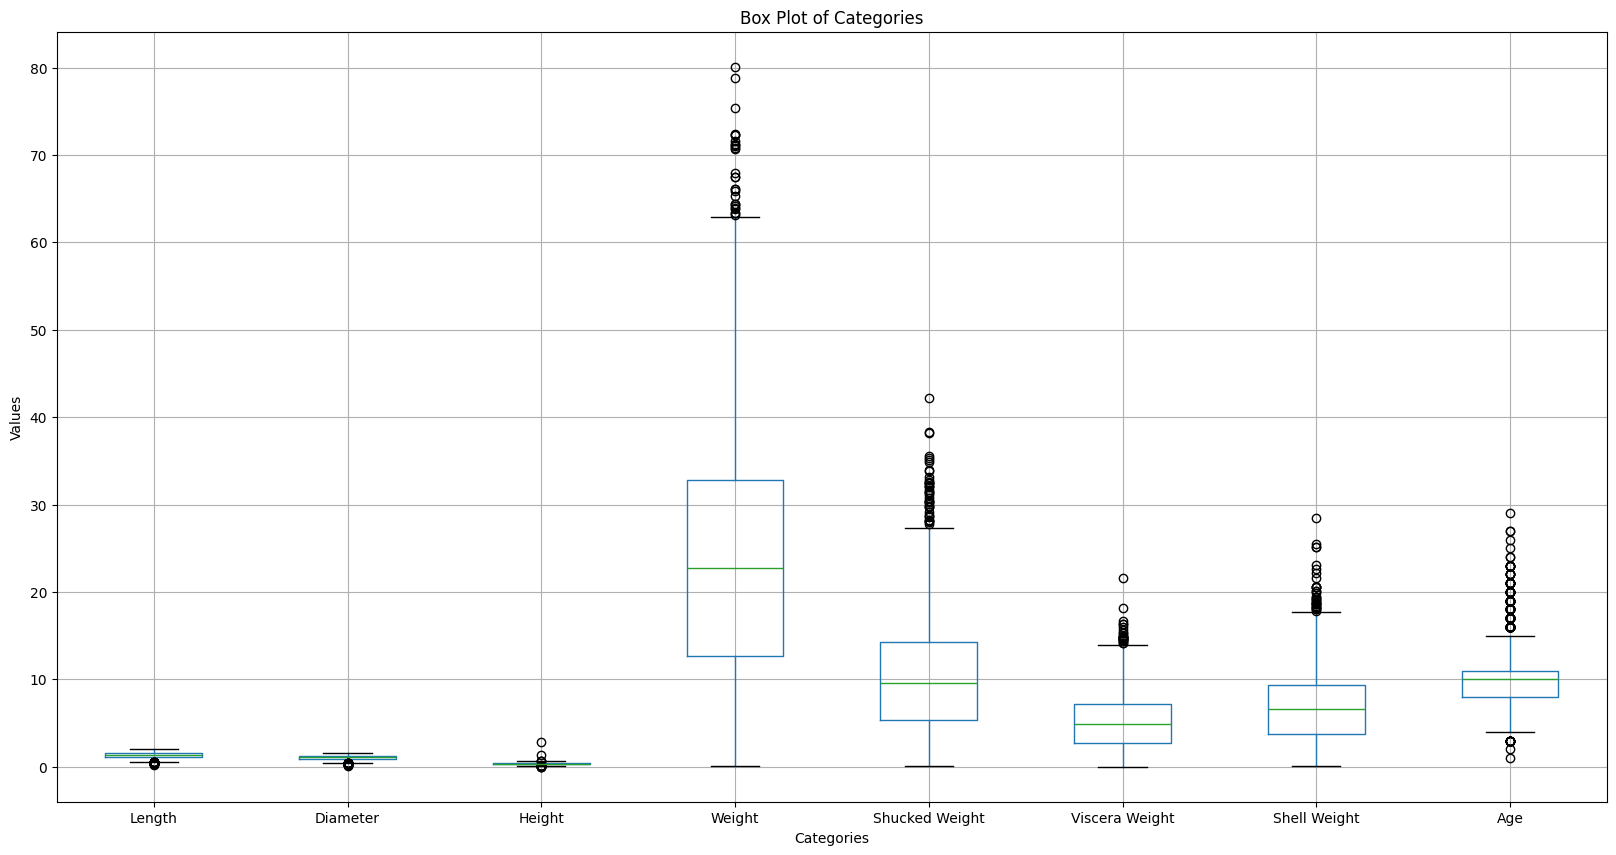

In [ ]:
# Melakukan Visualisasi terhadap Outliers

plt.figure(figsize=(20, 10))
data.boxplot()
plt.title('Box Plot of Categories')
plt.ylabel('Values')
plt.xlabel('Categories')
plt.show()

# *DATA PREPROCESSING*

**Data preprocessing** adalah proses mengubah data mentah menjadi format yang lebih bersih dan siap digunakan untuk analisis atau pelatihan model. Pada tahap ini, kita akan melakukan beberapa tahap :    
1. Mengubah data kategorika(Sex) menjadi bentuk numerik yang dapat diproses oleh algoritma
2. Penanganan Outliers
3. Melakukan pengurangan fitur yang sedikit memiliki korelasi dengan target
4. Melakukan Normalisasi menggunakan standar scaller

In [ ]:
# PREPROCESSING

data['Sex'] = data['Sex'].map({'I':0, 'F':1, 'M':2}) #
data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,1,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,1,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,1,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,0,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,0,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [ ]:
# PREPROCESSING
# Melakukan penanganan outliers pada sebuah data

df_numeric = data.select_dtypes(include=[float, int])
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR # rumus mencari statistika mencari lower bound
upper_bound = Q3 + 1.5 * IQR
def replace_outliers(column):
    col_name = column.name
    column = column.copy()
    column[column < lower_bound[col_name]] = lower_bound[col_name] # mengganti nilai outliers menjadi lowerbound
    column[column > upper_bound[col_name]] = upper_bound[col_name] # mengganti nilai outliers menjadi upperbound
    return column
df_no_outliers = df_numeric.apply(replace_outliers)
#bisa menganggu prediksi pak

<ipython-input-8-596786093507>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column[column < lower_bound[col_name]] = lower_bound[col_name] # mengganti nilai outliers menjadi lowerbound


In [ ]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyaring data untuk menghapus outliers
    df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_clean

# Menerapkan fungsi untuk menghapus outliers
df_clean = remove_outliers(data)

In [ ]:
data = df_no_outliers.copy()
data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0
3,1,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10.0
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0
...,...,...,...,...,...,...,...,...,...
3888,1,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8.0
3889,1,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10.0
3890,0,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5.0
3891,0,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6.0


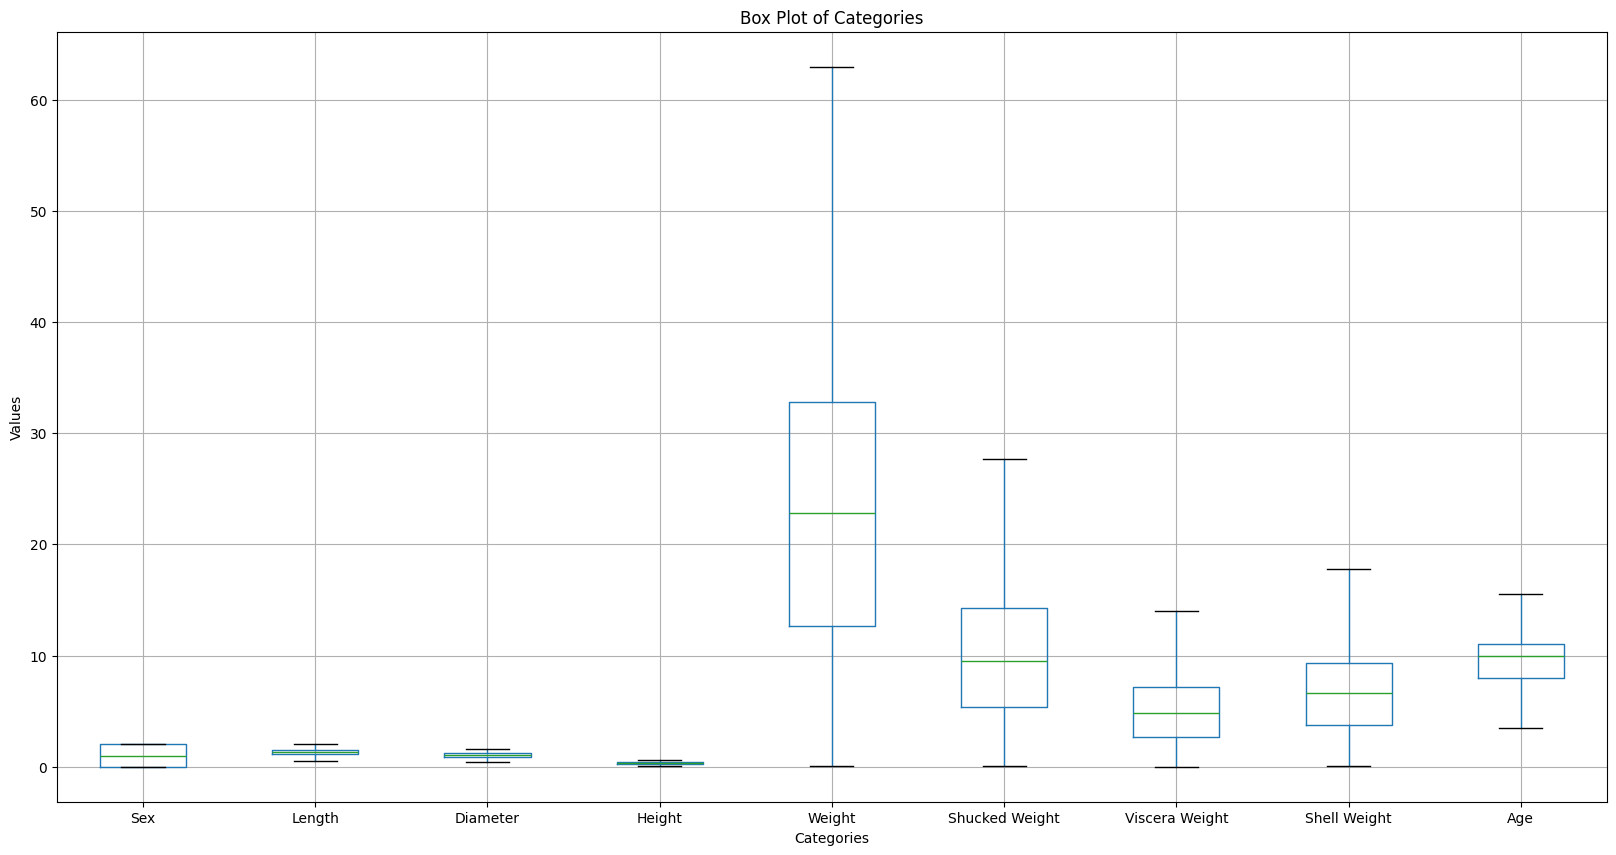

In [ ]:
# PREPROCESSING
# Melakukan Visualisasi setelah penanganan outliers

plt.figure(figsize=(20, 10))
data.boxplot()
plt.title('Box Plot of Categories')
plt.ylabel('Values')
plt.xlabel('Categories')
plt.show()

In [ ]:
# PREPROCESSING
# Melakukan check data setelah penanganan outliers

data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0
3,1,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10.0
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0
...,...,...,...,...,...,...,...,...,...
3888,1,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8.0
3889,1,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10.0
3890,0,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5.0
3891,0,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6.0


In [ ]:
# PREPROCESSING
# Membagi data antar calon fitur dan target(dikatakan calon karena kemungkinan ada kolom yang bakal didrop)

x = data[['Sex','Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']]
y = data['Age']

In [ ]:
print(x)
print(y)

      Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       1  1.4375    1.1750  0.4125  24.635715       12.332033   
1       2  0.8875    0.6500  0.2125   5.400580        2.296310   
2       0  1.0375    0.7750  0.2500   7.952035        3.231843   
3       1  1.1750    0.8875  0.2500  13.480187        4.748541   
4       0  0.8875    0.6625  0.2125   6.903103        3.458639   
...   ...     ...       ...     ...        ...             ...   
3888    1  1.4625    1.1375  0.3250  24.819987       11.651644   
3889    1  1.5500    1.2125  0.4375  34.458817       15.450477   
3890    0  0.6250    0.4625  0.1625   2.012815        0.765436   
3891    0  1.0625    0.7750  0.2625  10.347568        4.507570   
3892    0  0.7875    0.6125  0.2125   4.068153        1.502523   

      Viscera Weight  Shell Weight  
0           5.584852      6.747181  
1           1.374951      1.559222  
2           1.601747      2.764076  
3           2.282135      5.244657  
4           1.488349  

In [ ]:
# PREPROCESSING
# Melihat korelasi tiap calon fitur terhadap target(age)
# Asumsi : nilai yang berada dibawah 0.5 tidak memiliki keterkaitan yang cukup = DROP COLUMN

data.corr()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Sex,1.000000,0.448676,0.458191,0.450179,0.460185,0.441500,0.453687,0.448540,0.386348
Length,0.448676,1.000000,0.986530,0.900143,0.931735,0.909915,0.909759,0.909427,0.601408
Diameter,0.458191,0.986530,1.000000,0.906681,0.932161,0.905451,0.906409,0.917487,0.619775
Height,0.450179,0.900143,0.906681,1.000000,0.891908,0.845232,0.869980,0.897160,0.645397
Weight,0.460185,0.931735,0.932161,0.891908,1.000000,0.970583,0.966717,0.959932,0.575356
Shucked Weight,0.441500,0.909915,0.905451,0.845232,0.970583,1.000000,0.934503,0.893467,0.466811
Viscera Weight,0.453687,0.909759,0.906409,0.869980,0.966717,0.934503,1.000000,0.915101,0.546593
Shell Weight,0.448540,0.909427,0.917487,0.897160,0.959932,0.893467,0.915101,1.000000,0.652301
Age,0.386348,0.601408,0.619775,0.645397,0.575356,0.466811,0.546593,0.652301,1.000000


In [ ]:
# PREPROCESSING
# Melakukan drop COLUMN
x = data.drop(['Sex', 'Shucked Weight'], axis=1)

In [ ]:
x

,Length,Diameter,Height,Weight,Viscera Weight,Shell Weight,Age
0,1.4375,1.1750,0.4125,24.635715,5.584852,6.747181,9.0
1,0.8875,0.6500,0.2125,5.400580,1.374951,1.559222,6.0
2,1.0375,0.7750,0.2500,7.952035,1.601747,2.764076,6.0
3,1.1750,0.8875,0.2500,13.480187,2.282135,5.244657,10.0
4,0.8875,0.6625,0.2125,6.903103,1.488349,1.700970,6.0
...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,5.854172,6.378637,8.0
3889,1.5500,1.2125,0.4375,34.458817,7.172423,9.780577,10.0
3890,0.6250,0.4625,0.1625,2.012815,0.524466,0.637864,5.0
3891,1.0625,0.7750,0.2625,10.347568,2.338834,2.976698,6.0


# Mekanisme Pembagian Data Test dan Training

Pada proses ini akan dilakukan *Data Splitting* untuk nantinya dilakukan pengujian data training dan juga data testing.  Aturan pada *Data Splitting* yang baik adalah Perbandingan data train dan test adalah 80% : 20% dari total keseluruhan data set.

In [ ]:

#untuk split model
# Misalkan X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Metode Dan Eksperimen

**METODE**

metode yang digunakan pada project kali ini menggunakan kNN regression. Algoritma dibawah merupakan Algoritma kNN Regression dengan 3 Fungsi utama.

1. Fungsi build() => Melakukan perhimpunan prediksi tiap data test
2. Fungsi predict() => Melakukan perhitungan total distance/k
3. Fungsi evaluate_distance() => Melakukan perhitungan jarak dengan Encludian Distance

**MATRIKS EVALUASI**

Bedasarkan dengan model yang digunakan yaitu kNN Regression, artinya permasalahan ini terkait dengan metode Regresi. Sehingga, Matriks Evaluasi yang digunakan :

1. MAE
2. MSE
3. RMSE
4. R-Squared

**SETTING PARAMETER**

Setting parameter yang digunakan untuk kNN Regression yaitu :    
1. Nilai K
2. Penggunaan Distance Matriks(Dalam kasus ini kita menggunakan Encludian Matrix)


In [ ]:
# PREPROCESSING
# Melakukan Normalisasi dengan standar scaler(library) secara matematis menemukan normalisasi seperti casebased

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # melakukan normalisasi kayak di case based itu jirrr
X_test = scaler.transform(X_test) # melakukan normalisasi menggunakan mean dan stdv yang sudah ada di train

In [ ]:
# DATA TRAINING
# Melakukan convert dari y dataframe ke numpy(bentuk array)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# DATA TRAINING
# Model kNN-Regression saat menghitung Encludian Matrix

def evaluate_distance(known_data, unknown_data):
    distances = []
    for i in range(len(known_data)):
        sumValue = 0
        for j in range(len(known_data[i])):
            diff = (unknown_data[j] - known_data[i][j]) ** 2
            sumValue += diff
        distances.append(math.sqrt(sumValue))
    return distances

In [ ]:
# DATA TRAINING
# Model kNN-Regression saat menghitung Encludian nilai predict tiap 1 target

def predict(X_train, y_train, X_test, kNeighbor):
    distances = evaluate_distance(X_train, X_test)
    distances_with_index = []
    for index, distance in enumerate(distances):
        distances_with_index.append((distance, index))
    sorted_distances = sorted(distances_with_index)
    sumValue = 0
    for distance_value, index in sorted_distances[0:kNeighbor]:
        sumValue += y_train[index]
    predicted_value = sumValue/kNeighbor
    return predicted_value

In [ ]:
# DATA TRAINING
# Model kNN-Regression saat melakukan pengembalian nilai semua predictions tiap target(20% dari total data)

def build_model(X_train, y_train, X_test, neighbors):
    predictions = []
    for i in range(len(X_test)):
        predicted_value = predict(X_train, y_train, X_test[i], neighbors)
        predictions.append(predicted_value)
    return predictions

In [ ]:
# DATA TRAINING
# Model kNN-Regression dipanggil

y_pred = build_model(X_train, y_train, X_test,5 )

# HASIL DAN ANALISIS

MATRIKS EVALUASI

Bedasarkan dengan model yang digunakan yaitu kNN Regression, artinya permasalahan ini terkait dengan metode Regresi. Sehingga, Matriks Evaluasi yang digunakan :

1. MAE
2. MSE
3. RMSE
4. R-Squared


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE : {rmse}')
print(f'R-squared: {r2}')

MAE: 0.10410783055198963
MSE: 0.047792041078305494
RMSE : 0.21861390870277558
R-squared: 0.9931923496185184


In [ ]:
# Melakukan Elbow Method untuk mencari parameter neighbor terbaik
rmse_rates = []
r2_rates = []
k_values = range(1, 8)

for k in k_values:
    print(f'[+] using {k}-Neighbors to KNN...')
    predictions = build_model(X_train, y_train, X_test, k)
    r2 = r2_score(y_test, np.array(predictions))
    rmse = np.sqrt(mean_squared_error(y_test, np.array(predictions)))
    print(r2)
    print(rmse)

    rmse_rates.append(rmse)
    r2_rates.append(r2)

[+] using 1-Neighbors to KNN...
0.9926858443389938
0.22660071028103956
[+] using 2-Neighbors to KNN...
0.9935658286919585
0.2125325618788644
[+] using 3-Neighbors to KNN...
0.9938845531834364
0.20720167612377996
[+] using 4-Neighbors to KNN...
0.9932515485658997
0.2176613060678871
[+] using 5-Neighbors to KNN...
0.9931923496185184
0.21861390870277558
[+] using 6-Neighbors to KNN...
0.9929690139071196
0.222170957572806
[+] using 7-Neighbors to KNN...
0.9928491067421412
0.22405741188755507


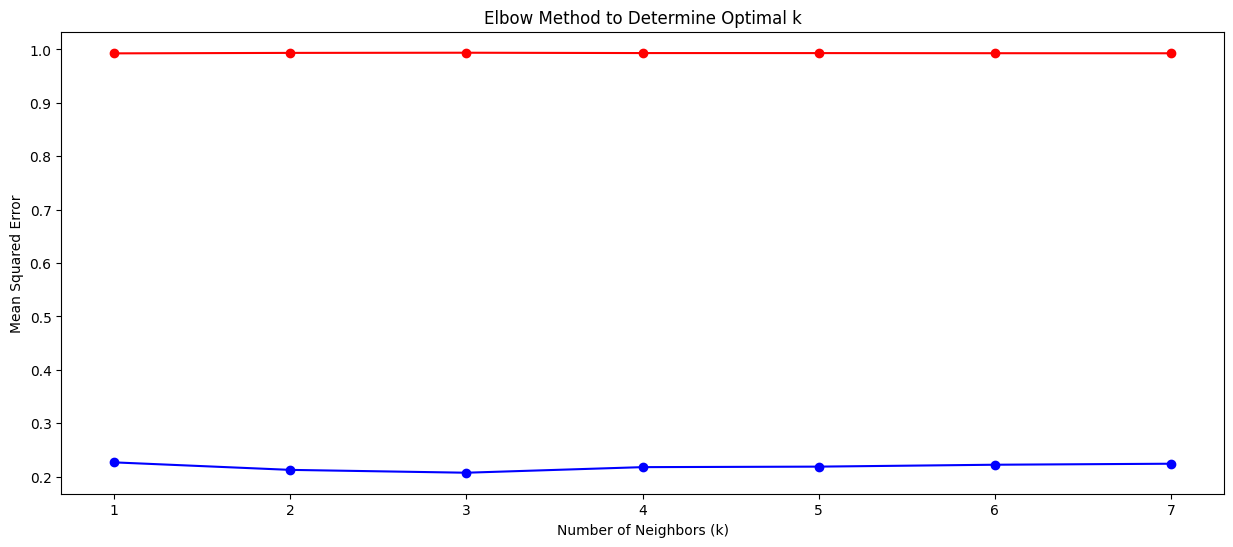

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(k_values, rmse_rates, color='blue', marker='o')
plt.plot(k_values, r2_rates, color='red', marker='o')

plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')

plt.show()

In [ ]:
highest_index = r2_rates.index(max(r2_rates))

print("Index nilai tertinggi:", highest_index+1)
print("Nilai tertinggi:", r2_rates[highest_index])

Index nilai tertinggi: 3
Nilai tertinggi: 0.9938845531834364


In [ ]:
y_pred = build_model(X_train, y_train, X_test, 3)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE : {rmse}')
print(f'R-squared: {r2}')

MAE: 0.08429610611895595
MSE: 0.0429325345885038
RMSE : 0.20720167612377996
R-squared: 0.9938845531834364


In [ ]:
pred_table = pd.DataFrame({
    'actual_age': y_test,
    'predictions': y_pred
})

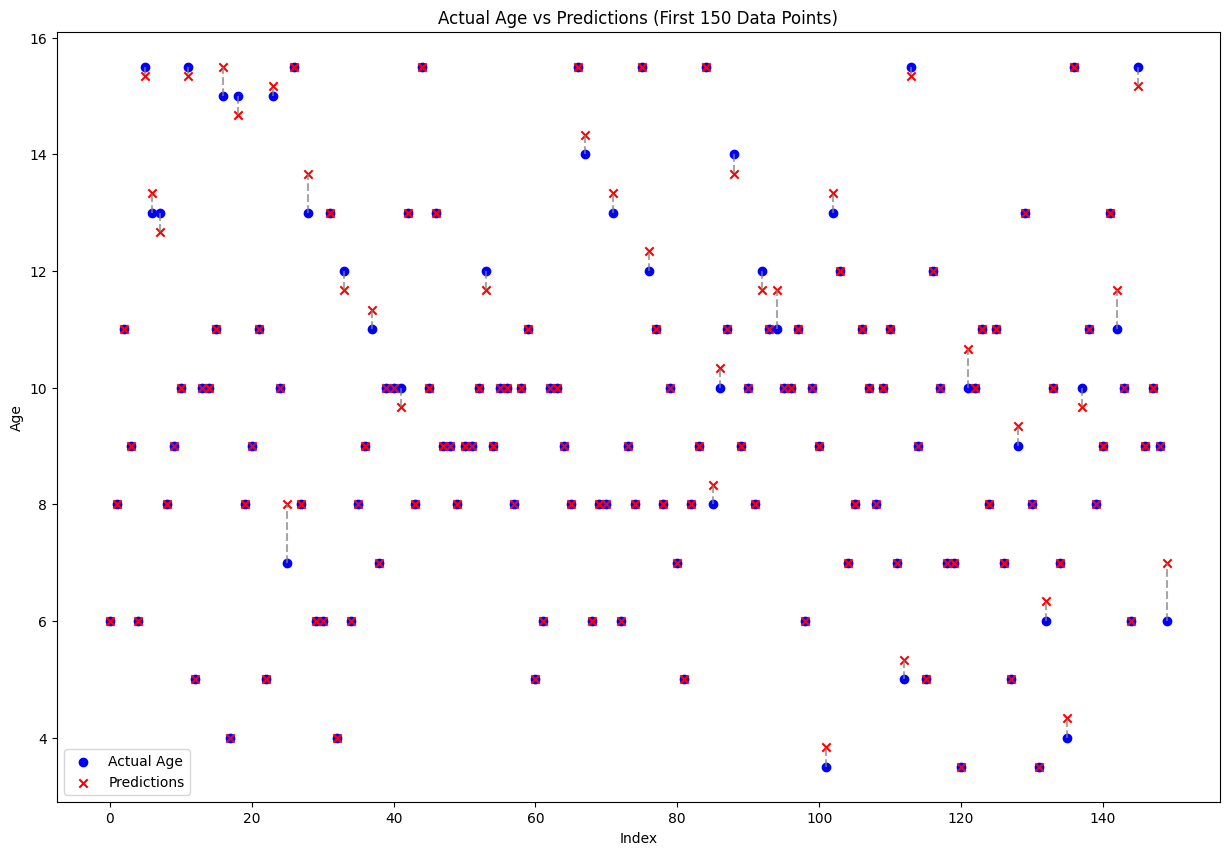

In [ ]:
pred_100th = pred_table.head(150)
plt.figure(figsize=(15, 10))
plt.scatter(pred_100th.index, pred_100th['actual_age'], label='Actual Age', color='blue', marker='o')
plt.scatter(pred_100th.index, pred_100th['predictions'], label='Predictions', color='red', marker='x')
for i in range(len(pred_100th)):
    plt.plot([pred_100th.index[i], pred_100th.index[i]],
             [pred_100th['actual_age'].iloc[i], pred_100th['predictions'].iloc[i]],
             color='gray', linestyle='--', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Actual Age vs Predictions (First 150 Data Points)')
plt.legend()
plt.show()

In [ ]:
pred_table

,actual_age,predictions
0,6.0,6.000000
1,8.0,8.000000
2,11.0,11.000000
3,9.0,9.000000
4,6.0,6.000000
...,...,...
774,7.0,7.666667
775,3.5,3.500000
776,7.0,7.000000
777,8.0,8.000000


# KESIMPULAN

Kesimpulan dari proses analisis pemodelan ini adalah bahwa Model kNN Regression yang telah di bangun memiliki performa dan ketepatan memprediksi nilai target dengan sangat baik, dengan kemampuan menangani banyak nya data.

Hal tesebut ditandai dengan Elbow Method diatas untuk mencari nilai k optimal, dimana didapatkan nilai k optimal adalah 3 dengan RMSE sebesar 0.9938. Pada visualisasi scater plot diatas dan juga table prediksi dan aktual, mengindikasikan bahwa model ini dapat memprediksi umur kepiting dengan sangat baik.